Exercise A:

A.1) Calculate an affine transform (cv2.getAffineTransform) between images 'ref.jpeg' and 'rotzoom.jpeg

A.2) Apply the found affine transform (cv2.warpAffine) to align 'rotzoom.jpeg' with 'ref.jpeg' - save the resulting image. Does the result look as expected?

A.3) Calculate an affine transform between images 'ref.jpeg' and 'persp1.jpeg' and use it to align the two images. Save the resulting image - does it look like expected? Why? Why not?

- So the result looks nothing like you would "probably" expect because of the different perspective the images are taken at. Because you take the image at a low angle and try to align it with the reference image, what you end up with is a weirdly rotated img. What ends up happening is you miss or need more information in order to properly align them.

A.4) Try to calculate a projective transform (cv2.getPerspectiveTransform) between the two images 'ref.jpeg' and 'persp1.jpeg' and use it to align the two images (cv2.warpPerspective). Save the resulting - does it look like expected? Why? Why not?

In [35]:
# Importing libraries & packages
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time

# Images path
data_A = "../Images/exe_a/"
data_B = "../Images/exe_b/"
data_C = "../Images/exe_c/"
output = "output/"

# Load in imgs
img1 = cv.imread(data_A+"ref.jpeg")
img2 = cv.imread(data_A+"rotzoom.jpeg")
img3 = cv.imread(data_A+"persp1.jpeg")

# Get img shapes
x1, y1, _ = img1.shape
x2, y2, _ = img2.shape
x3, y3, _ = img3.shape

[[ 5.14797373e-01 -6.55245837e-01  2.31975872e+03]
 [ 6.95129733e-01  5.32136689e-01 -7.41947351e+02]]
[[-2.57632953e-01 -1.04738564e+00  3.50917075e+03]
 [ 8.55366125e-01 -4.50056576e-01  5.95265354e+02]]


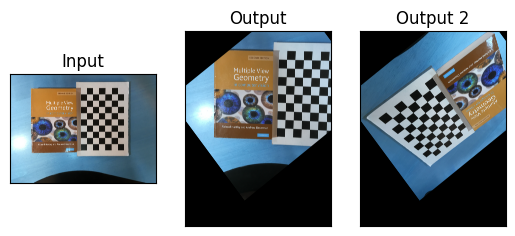

In [34]:
# Choose 3 points from input and output img
pts1 = np.float32([[598,2197],  # Left bottom corner
                   [1736,547],  # Top left corner of N, in "SECOND EDITION"
                   [1310,795]]) # The top right corner of P, in "MULTIPLE"
pts2 = np.float32([[1384,3715],
                   [732,1466],
                   [644,2047]])
pts3 = np.float32([[1054,118],  # Left bottom corner
                   [2489,1834],  # Top left corner of N, in "SECOND EDITION"
                   [2339,1358]]) # The top right corner of P, in "MULTIPLE"

# Calculate the affine transform M from pts2 to pts1
M = cv.getAffineTransform(src=pts2,dst=pts1)
print(M)

M2 = cv.getAffineTransform(src=pts1,dst=pts3)
print(M2)

# Apply to affine transform to img2 and save the results
img2_t = cv.warpAffine(img2,M,(y2,x2))
cv.imwrite(output+'rot_transformed.png', img2_t)

img3_t = cv.warpAffine(img3,M,(y3,x3))
cv.imwrite(output+'ref_persp1_transformed.png', img3_t)

# Plotting the images
plt.subplot(131),plt.imshow(img1),plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img2_t),plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img3_t),plt.title('Output 2'), plt.xticks([]), plt.yticks([])
plt.show()

A.4) Try to calculate a projective transform (cv2.getPerspectiveTransform) between the two images 'ref.jpeg' and 'persp1.jpeg' and use it to align the two images (cv2.warpPerspective). Save the resulting - does it look like expected? Why? Why not?

- I guess it does what I expected, it warps the persp1 img as the ref? Then it manages to actually align the two imgs correctly?

[[-2.81789582e-01  5.88250835e-01  7.43642798e+02]
 [-9.88002718e-01 -7.27757997e-02  2.94586589e+03]
 [-1.27817919e-04 -1.96589015e-05  1.00000000e+00]]


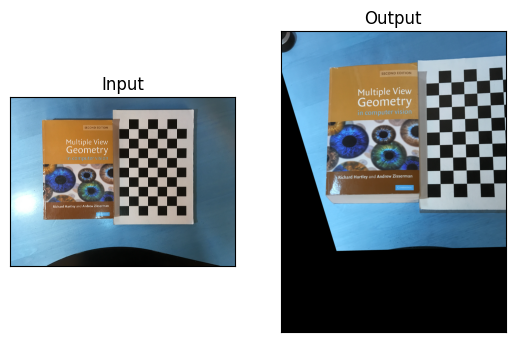

In [37]:
# Choose 4 points from input and output img
pts1 = np.float32([[598,2197],  # Left bottom corner
                   [1736,547],  # Top left corner of N, in "SECOND EDITION"
                   [1310,795],  # The top right corner of P, in "MULTIPLE"
                   [1776,2132]]) 
pts3 = np.float32([[1054,118],  # Left bottom corner
                   [2489,1834], # Top left corner of N, in "SECOND EDITION"
                   [2339,1358], # The top right corner of P, in "MULTIPLE"
                   [1062,1750]]) 

# Calculate the perspective transform M from pts2 to pts1
M = cv.getPerspectiveTransform(src=pts3,dst=pts1)
print(M)

# Apply to perspective transform to img3 and save the results
img3_t = cv.warpPerspective(img3,M,(y3,x3))
cv.imwrite(output+'perspective_transformed.png', img3_t)

# Plotting the images
plt.subplot(121),plt.imshow(img1),plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3_t),plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()